In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the list of directories
exclude = ['.venv', '__pycache__']
directories = [d for d in os.listdir('.') if os.path.isdir(d) and d not in exclude]

# Loop through the directories
for directory in directories:
    # Initialize a list to store the dataframes
    df_list = []
    df_concat = pd.DataFrame()

    # Loop through the 30 files in the directory
    for i in range(0, 30):
        # Load the Excel file
        file_path = f'{directory}/{i}_{directory}.csv'
        df = pd.read_csv(file_path, nrows=101, usecols=[0, 1], header=None)
        
        df = df.drop(index=0)

        df_concat[i] = df.iloc[:, 1:]

    df_concat = df_concat.astype(float)
    
    # Calculate the median for each row
    median_values = df_concat.median(axis=1)

    # Create a new dataframe for the median values
    df_median = pd.DataFrame(median_values, columns=['Median Value'])

    # Save the dataframe to a new Excel file
    df_median.to_csv(f'{directory}/overall.csv', index=False)


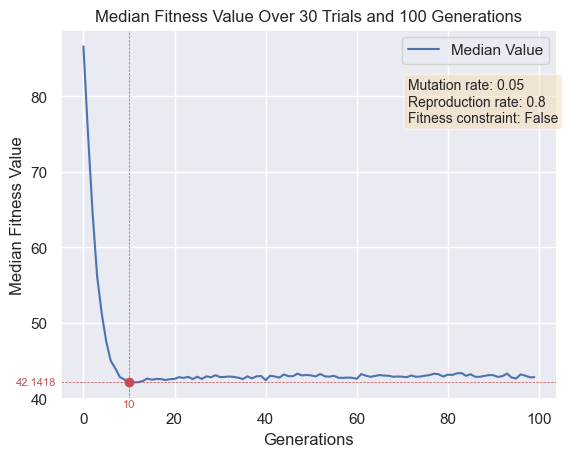

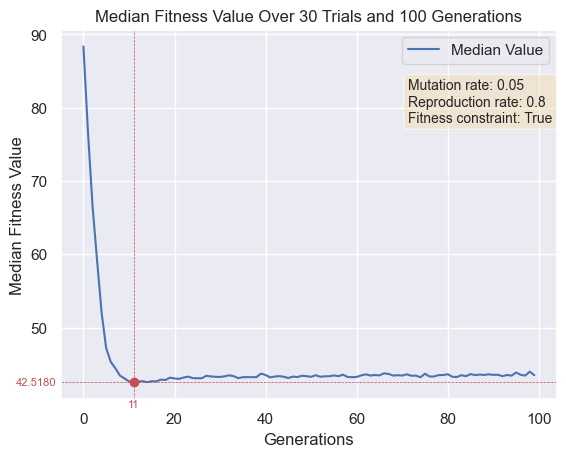

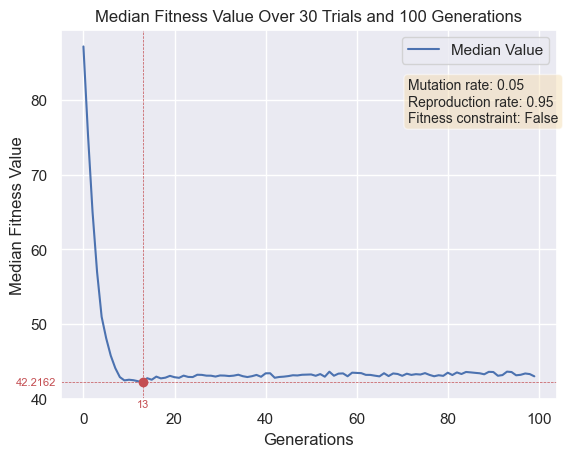

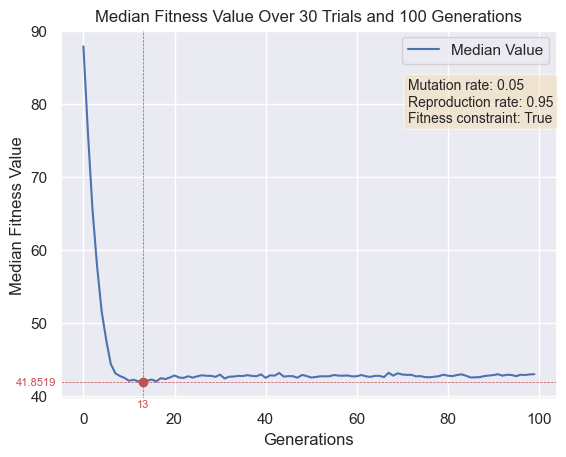

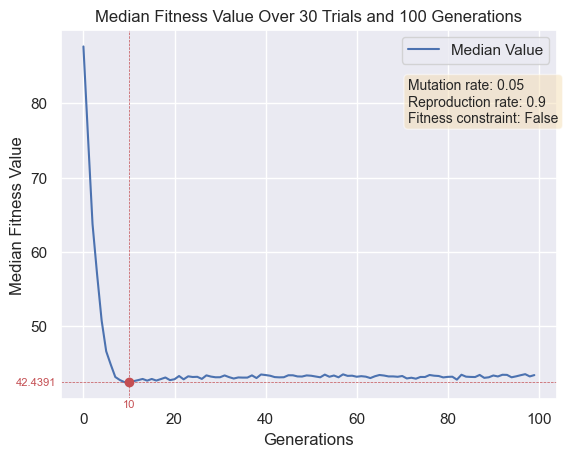

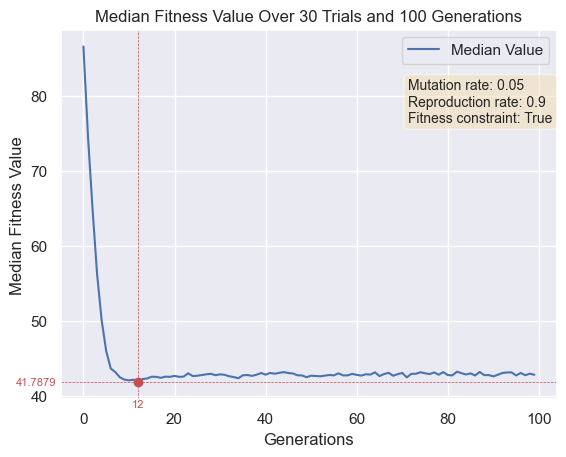

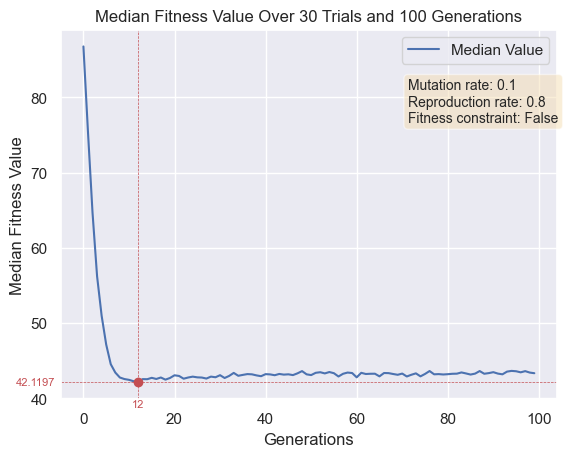

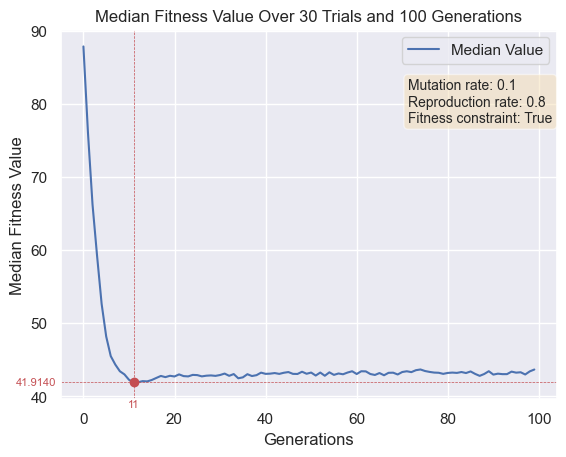

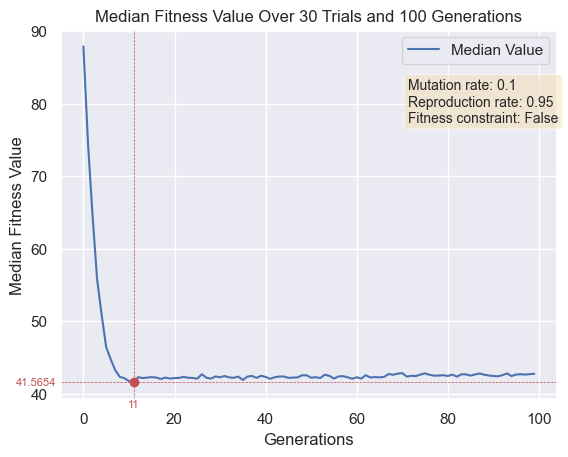

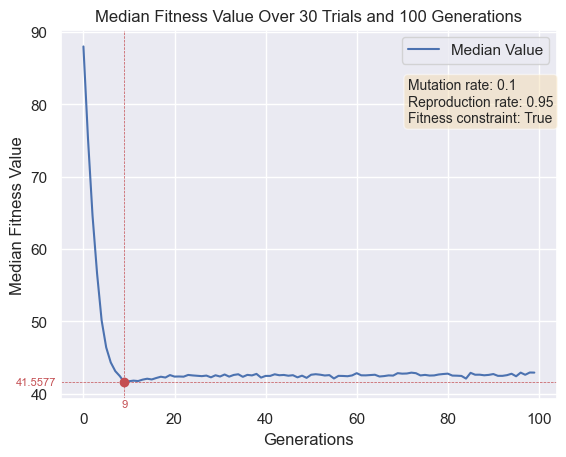

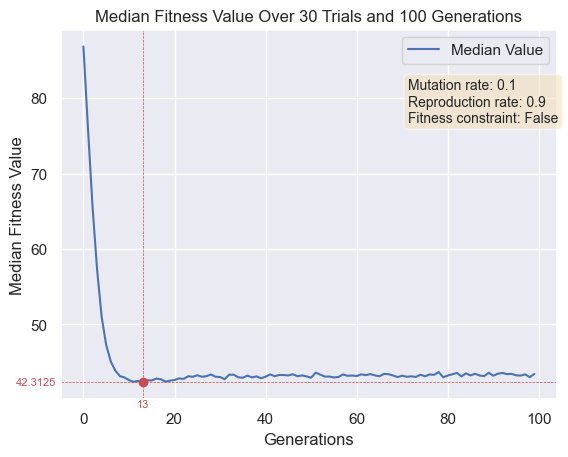

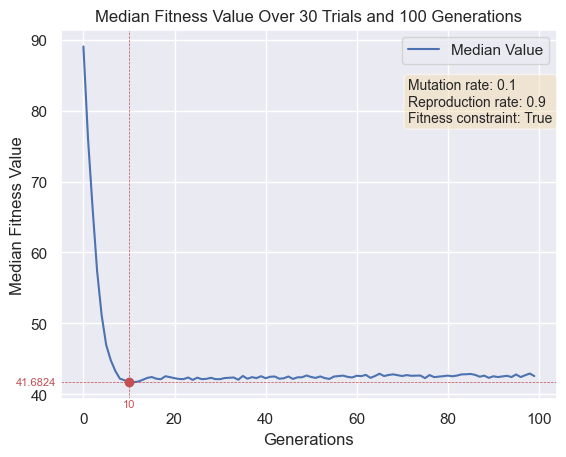

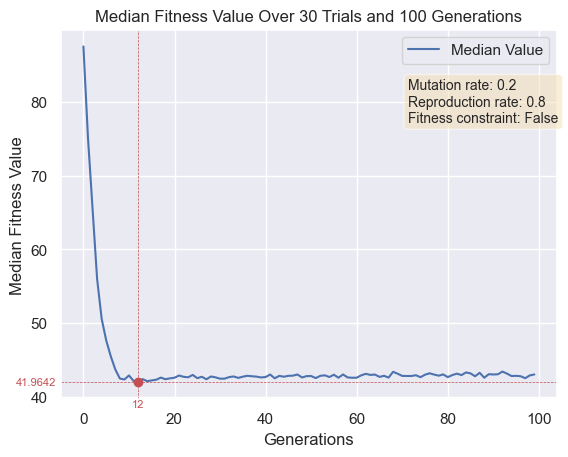

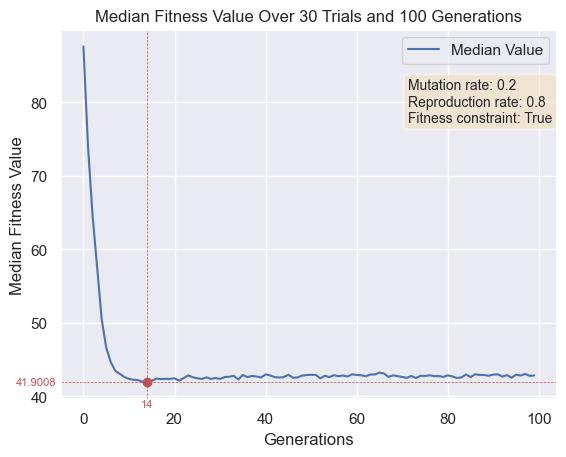

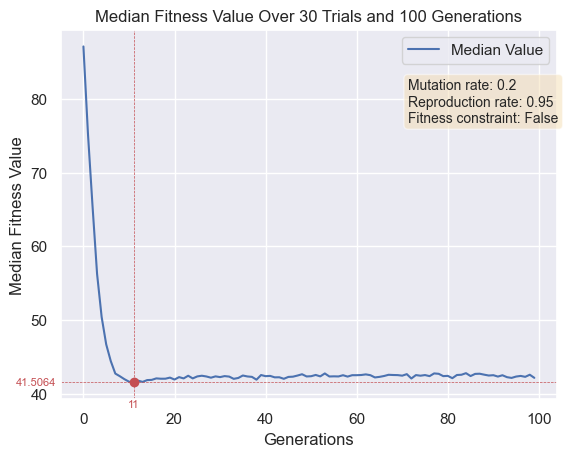

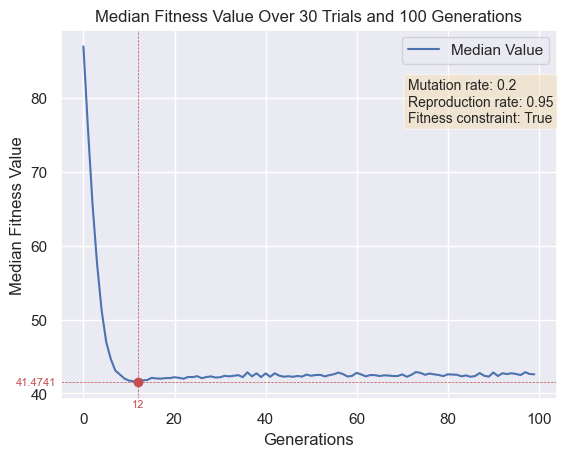

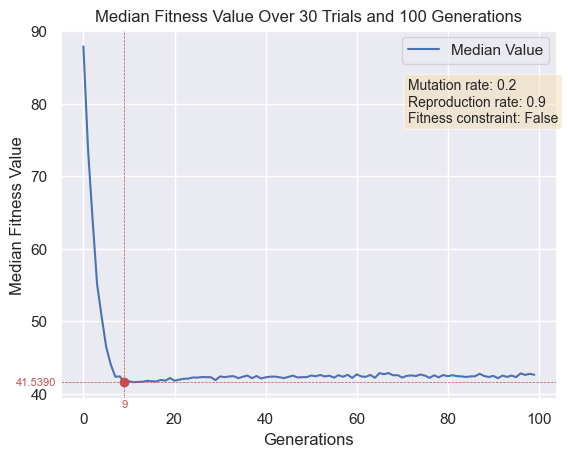

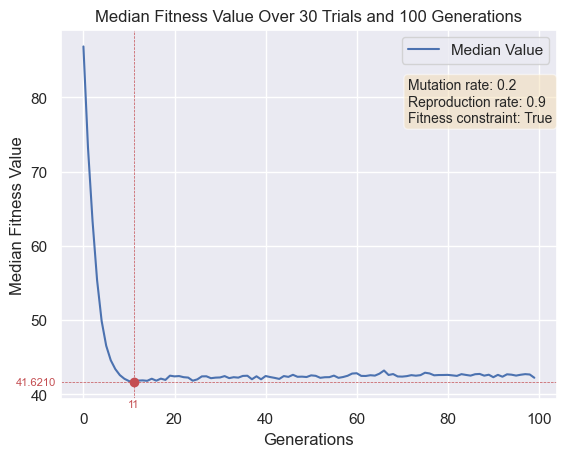

In [7]:
# Set the style of the plot
sns.set_theme()

# Get the list of directories
exclude = ['.venv', '__pycache__']
directories = [d for d in os.listdir('.') if os.path.isdir(d) and d not in exclude]

# Loop through the directories
for directory in directories:
    # Read the Excel file
    file_path = f'{directory}/overall.csv'
    df = pd.read_csv(file_path)

    # Plot the line graph
    sns.lineplot(data=df)

    # Add labels and title
    plt.xlabel('Generations')
    plt.ylabel('Median Fitness Value')
    plt.title('Median Fitness Value Over 30 Trials and 100 Generations')

    # Extract parameters from directory name
    mutation_rate, reproduction_rate, fitness_constraint = directory.split('_')

    # Add info box
    info_text = f"Mutation rate: {mutation_rate}\nReproduction rate: {reproduction_rate}\nFitness constraint: {fitness_constraint}"
    plt.text(0.70, 0.75, info_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='baseline', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Find the minimum y value and its corresponding x value
    min_y = min(df["Median Value"])
    min_x = df["Median Value"].idxmin()

    # Add a red dot to the plot to indicate the minimum value
    plt.plot(min_x, min_y, 'ro')

    # Draw lines from red dot to both axes for better visualization
    plt.axhline(y=min_y, color='r', linestyle='--', linewidth=0.5)
    plt.axvline(x=min_x, color='r', linestyle='--', linewidth=0.5)


    # Write the values where the lines touch the axes
    plt.text(min_x, plt.gca().get_ylim()[0] - 0.05, f'{min_x}', color='r', ha='center', va='top', fontsize=8)
    plt.text(plt.gca().get_xlim()[0]-10, min_y, f'{min_y:.4f}', color='r', ha='left', va='center', fontsize=8)

    # Display the plot
    plt.show()